In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings('ignore')
import requests
import io
import datetime as dt

# Step 1

# Loading of Project Dataset for Abuja, Lagos and Port Harcourt

In [3]:
data_abuja = pd.read_csv("Abuja_Branch.csv")

In [4]:
data_abuja.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


In [5]:
data_lagos = pd.read_csv("Lagos_Branch.csv")

In [6]:
data_lagos.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,197629.74,1/5/2019,13:08,Epay,188218.8,4.761905,9410.94,9.1
1,631-41-3108,A,Lagos,Normal,Male,Home and lifestyle,16678.8,7,5837.58,122589.18,3/3/2019,13:23,Card,116751.6,4.761905,5837.58,7.4
2,123-19-1176,A,Lagos,Member,Male,Health and beauty,20959.2,8,8383.68,176057.28,1/27/2019,20:33,Epay,167673.6,4.761905,8383.68,8.4
3,373-73-7910,A,Lagos,Normal,Male,Sports and travel,31071.6,7,10875.06,228376.26,2/8/2019,10:37,Epay,217501.2,4.761905,10875.06,5.3
4,355-53-5943,A,Lagos,Member,Female,Electronic accessories,24782.4,6,7434.72,156129.12,2/25/2019,14:36,Epay,148694.4,4.761905,7434.72,5.8


In [7]:
data_ph = pd.read_csv("Port_Harcourt_Branch.csv")

In [8]:
data_ph.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,226-31-3081,C,Port Harcourt,Normal,Female,Electronic accessories,5500.8,5,1375.20,28879.20,3/8/2019,10:29,Cash,27504.0,4.761905,1375.20,9.6
1,699-14-3026,C,Port Harcourt,Normal,Male,Electronic accessories,30740.4,7,10759.14,225941.94,3/25/2019,18:30,Epay,215182.8,4.761905,10759.14,4.1
2,315-22-5665,C,Port Harcourt,Normal,Female,Home and lifestyle,26481.6,10,13240.80,278056.80,2/24/2019,11:38,Epay,264816.0,4.761905,13240.80,8.0
3,300-71-4605,C,Port Harcourt,Member,Male,Electronic accessories,30974.4,5,7743.60,162615.60,2/25/2019,11:24,Epay,154872.0,4.761905,7743.60,4.8
4,183-56-6882,C,Port Harcourt,Member,Female,Food and beverages,35791.2,4,7158.24,150323.04,2/6/2019,10:42,Epay,143164.8,4.761905,7158.24,7.5


# Combine all the files generated in a list and export to a CSV

In [9]:
combine_file = pd.concat([data_abuja, data_lagos,data_ph])

In [10]:
combine_file.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


In [11]:
combine_file.to_csv("Supermarket_data.csv")

# Step 2 - Data Exploration

# Use the head() method to view first few rows of the dataset

In [12]:
df = pd.read_csv("Supermarket_data.csv")

In [13]:
df1= pd.DataFrame(df)

In [14]:
df1.head(5)

,Unnamed: 0,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


# Check the number of rows and columns present in the data using the shape attribute

In [15]:
np.shape(df1)

(1000, 18)

# Generate the names of the columns using the columns attribute.

In [16]:
result = df1.columns

In [17]:
result

Index(['Unnamed: 0', 'Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

# Use describe function to generate the statistical summary of the dataframe

In [18]:
df1.describe()

,Unnamed: 0,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,166.204000,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,96.337673,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.131498e-14,4215.177173,1.71858
min,0.000000,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,83.000000,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,166.000000,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,249.250000,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,339.000000,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000


# Use meaningful sentences to describe findings from the data statistical summary

### * The statistical summary show the following details as summary, The mean is 166.204, the max as 339.00, while the min is 0.000. The count shows as 1000.00 across all the columns.

In [19]:
df1.mean()

Unnamed: 0                    166.204000
Unit price                  20041.966800
Quantity                        5.510000
Tax 5%                       5536.572840
Total                      116268.029640
cogs                       110731.456800
gross margin percentage         4.761905
gross income                 5536.572840
Rating                          6.972700
dtype: float64

In [20]:
df1.max()

Unnamed: 0                               339
Invoice ID                       898-04-2717
Branch                                     C
City                           Port Harcourt
Customer type                         Normal
Gender                                  Male
Product line               Sports and travel
Unit price                           35985.6
Quantity                                  10
Tax 5%                               17874.0
Total                               375354.0
Date                                3/9/2019
Time                                   20:59
Payment                                 Epay
cogs                                357480.0
gross margin percentage             4.761905
gross income                         17874.0
Rating                                  10.0
dtype: object

In [21]:
df1.min()

Unnamed: 0                                      0
Invoice ID                            101-17-6199
Branch                                          A
City                                        Abuja
Customer type                              Member
Gender                                     Female
Product line               Electronic accessories
Unit price                                 3628.8
Quantity                                        1
Tax 5%                                     183.06
Total                                     3844.26
Date                                     1/1/2019
Time                                        10:00
Payment                                      Card
cogs                                       3661.2
gross margin percentage                  4.761905
gross income                               183.06
Rating                                        4.0
dtype: object

# Use of correct method to check for Missing values

In [22]:
df1.isnull()

,Unnamed: 0,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Check the information of the DataFrame using the info method.

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1000 non-null   int64  
 1   Invoice ID               1000 non-null   object 
 2   Branch                   1000 non-null   object 
 3   City                     1000 non-null   object 
 4   Customer type            1000 non-null   object 
 5   Gender                   1000 non-null   object 
 6   Product line             1000 non-null   object 
 7   Unit price               1000 non-null   float64
 8   Quantity                 1000 non-null   int64  
 9   Tax 5%                   1000 non-null   float64
 10  Total                    1000 non-null   float64
 11  Date                     1000 non-null   object 
 12  Time                     1000 non-null   object 
 13  Payment                  1000 non-null   object 
 14  cogs                     

# Step 3 - Dealing with DateTime Features

# Use to_datetime() to convert the date column to datetime

In [24]:
df1['Date'] = pd.to_datetime(df1['Date'])

# Check the datatype to confirm if it's in datetime

In [25]:
dateTimetype = df1.dtypes['Date'] 

In [26]:
print(dateTimetype)

datetime64[ns]


# Accurate conversion of the time column & prints appropriate data type

In [27]:
df1['Time'] = pd.to_datetime(df1['Time'])

In [28]:
dateTime_t = df1.dtypes['Time']

In [29]:
print(dateTime_t)

datetime64[ns]


# Accurate extraction of the Day, Month, Year & Hour features

In [30]:
df1["year"] = df1['Date'].dt.year

In [31]:
df1["month"] = df1['Date'].dt.month

In [32]:
df1["day"] = df1['Date'].dt.day

In [33]:
df1["hour"] = df1['Date'].dt.hour

In [34]:
from datetime import timedelta

# The numbers of unique hours of sales in the supermarket are accurately determined.

In [35]:
t_unique= df1.hour.nunique()

In [36]:
print(t_unique)

1


# Step 4 - Unique Values in Columns

# Appropriate method to generate the unique values in the categorical columns (apart from the example - Branch column).

In [37]:
categorical_columns = [col for col in df1.columns if df1[col].dtype == "object" ]

In [38]:
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

In [42]:
df['Product line'].unique().tolist()

['Food and beverages',
 'Fashion accessories',
 'Electronic accessories',
 'Sports and travel',
 'Home and lifestyle',
 'Health and beauty']

In [43]:
print("Total Number of unique values in the Product line Column : {}". format(len(df1['Product line'].unique().tolist())))

Total Number of unique values in the Product line Column : 6


In [60]:
unique_cat =(df1['Product line'].unique())

In [61]:
print(unique_cat)

['Food and beverages' 'Fashion accessories' 'Electronic accessories'
 'Sports and travel' 'Home and lifestyle' 'Health and beauty']


# Generated the count figure of the categorical values using the value_counts() method

In [62]:
df1['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

# Step 5 - Aggregation with GroupBy

In [63]:
group_city = df1.groupby('City')

In [64]:
print(group_city)

In [65]:
group_city.sum()

,Unnamed: 0,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,year,month,day,hour
City,,,,,,,,,,,,,
Abuja,54946,6652396.8,1820,1820531.52,38231161.92,36410630.4,1580.952381,1820531.52,2263.6,670308,665,5068,0
Lagos,57630,6705176.4,1859,1820577.78,38232133.38,36411555.6,1619.047619,1820577.78,2389.2,686460,688,5232,0
Port Harcourt,53628,6684393.6,1831,1895463.54,39804734.34,37909270.8,1561.904762,1895463.54,2319.9,662232,640,4956,0


In [67]:
group_city.mean()

,Unnamed: 0,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,year,month,day,hour
City,,,,,,,,,,,,,
Abuja,165.5,20037.339759,5.481928,5483.528675,115154.102169,109670.573494,4.761905,5483.528675,6.818072,2019.0,2.003012,15.265060,0.0
Lagos,169.5,19721.107059,5.467647,5354.640529,112447.451118,107092.810588,4.761905,5354.640529,7.027059,2019.0,2.023529,15.388235,0.0
Port Harcourt,163.5,20379.248780,5.582317,5778.852256,121355.897378,115577.045122,4.761905,5778.852256,7.072866,2019.0,1.951220,15.109756,0.0


In [69]:
# Iterate over all the groups
for grpName, rows in df1.groupby('City'):
    print("Group Name: ", grpName)
    print('Group Content: ')
    print(rows)

Group Name:  Abuja
Group Content: 
     Unnamed: 0   Invoice ID Branch   City Customer type  Gender  \
0             0  692-92-5582      B  Abuja        Member  Female   
1             1  351-62-0822      B  Abuja        Member  Female   
2             2  529-56-3974      B  Abuja        Member    Male   
3             3  299-46-1805      B  Abuja        Member  Female   
4             4  319-50-3348      B  Abuja        Normal  Female   
..          ...          ...    ...    ...           ...     ...   
327         327  552-44-5977      B  Abuja        Member    Male   
328         328  430-53-4718      B  Abuja        Member    Male   
329         329  602-16-6955      B  Abuja        Normal  Female   
330         330  690-01-6631      B  Abuja        Normal    Male   
331         331  303-96-2227      B  Abuja        Normal  Female   

               Product line  Unit price  Quantity    Tax 5%  ...  \
0        Food and beverages     19742.4         3   2961.36  ...   
1       Fash

In [70]:
print(df1.groupby('City').size()) # The size of each city

City
Abuja            332
Lagos            340
Port Harcourt    328
dtype: int64


# A table that shows the gross income of each city, and determines the city with the highest total gross income.

In [75]:
df1['City'].nunique()

3

In [79]:
abuja_gross = group_city.get_group("Abuja")["gross income"]

In [80]:
print(abuja_gross)

0       2961.36
1       1042.56
2       1836.72
3      10121.76
4       1450.80
         ...   
327     8928.00
328    10853.28
329    13788.00
330     3148.20
331    17528.40
Name: gross income, Length: 332, dtype: float64


In [81]:
lagos_gross = group_city.get_group("Lagos")["gross income"]

In [82]:
print(lagos_gross)

332     9410.94
333     5837.58
334     8383.68
335    10875.06
336     7434.72
         ...   
667     5090.40
668     2089.08
669      573.12
670     1184.76
671    11130.84
Name: gross income, Length: 340, dtype: float64


In [83]:
ph_gross = group_city.get_group("Port Harcourt")["gross income"]

In [84]:
print(ph_gross)

672     1375.20
673    10759.14
674    13240.80
675     7743.60
676     7158.24
         ...   
995    12594.96
996    12142.62
997    14821.20
998     1097.10
999      726.30
Name: gross income, Length: 328, dtype: float64


In [111]:
group_city.agg({"gross income": ['sum', 'max'],})

gross income         
                       sum      max
City                               
Abuja           1820531.52  17528.4
Lagos           1820577.78  17816.4
Port Harcourt   1895463.54  17874.0

# Optional - Use of appropriate methods & descriptions to explore other columns such as Unit Price, Quantity.

In [86]:
group_price = df1.groupby('Unit price')

In [87]:
print(group_price)

In [88]:
group_price.sum()

,Unnamed: 0,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,year,month,day,hour
Unit price,,,,,,,,,,,,
3628.8,322,7,1270.08,26671.68,25401.6,4.761905,1270.08,4.2,2019,3,28,0
3646.8,191,7,1276.38,26803.98,25527.6,4.761905,1276.38,8.3,2019,3,10,0
3657.6,263,5,914.40,19202.40,18288.0,4.761905,914.40,4.1,2019,2,24,0
3661.2,275,1,183.06,3844.26,3661.2,4.761905,183.06,5.9,2019,2,7,0
3664.8,290,8,1465.92,30784.32,29318.4,4.761905,1465.92,9.5,2019,3,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...
35935.2,415,11,19764.36,415051.56,395287.2,9.523810,19764.36,13.3,4038,4,29,0
35938.8,96,6,10781.64,226414.44,215632.8,4.761905,10781.64,8.5,2019,3,4,0
35960.4,155,2,3596.04,75516.84,71920.8,4.761905,3596.04,7.1,2019,2,26,0


In [89]:
group_price.mean()

,Unnamed: 0,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,year,month,day,hour
Unit price,,,,,,,,,,,,
3628.8,322.0,7.0,1270.08,26671.68,25401.6,4.761905,1270.08,4.20,2019.0,3.0,28.0,0.0
3646.8,191.0,7.0,1276.38,26803.98,25527.6,4.761905,1276.38,8.30,2019.0,3.0,10.0,0.0
3657.6,263.0,5.0,914.40,19202.40,18288.0,4.761905,914.40,4.10,2019.0,2.0,24.0,0.0
3661.2,275.0,1.0,183.06,3844.26,3661.2,4.761905,183.06,5.90,2019.0,2.0,7.0,0.0
3664.8,290.0,8.0,1465.92,30784.32,29318.4,4.761905,1465.92,9.50,2019.0,3.0,30.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
35935.2,207.5,5.5,9882.18,207525.78,197643.6,4.761905,9882.18,6.65,2019.0,2.0,14.5,0.0
35938.8,96.0,6.0,10781.64,226414.44,215632.8,4.761905,10781.64,8.50,2019.0,3.0,4.0,0.0
35960.4,155.0,2.0,3596.04,75516.84,71920.8,4.761905,3596.04,7.10,2019.0,2.0,26.0,0.0


In [93]:
df1['Unit price'].nunique()

943

In [103]:
group_price.agg({"gross income": ['sum', 'max']})

gross income          
                    sum       max
Unit price                       
3628.8          1270.08   1270.08
3646.8          1276.38   1276.38
3657.6           914.40    914.40
3661.2           183.06    183.06
3664.8          1465.92   1465.92
...                 ...       ...
35935.2        19764.36  16170.84
35938.8        10781.64  10781.64
35960.4         3596.04   3596.04
35971.2        10791.36  10791.36
35985.6        28788.48  16193.52

[943 rows x 2 columns]

In [94]:
group_quantity = df1.groupby('Quantity')

In [95]:
group_quantity.sum()

,Unnamed: 0,Unit price,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,year,month,day,hour
Quantity,,,,,,,,,,,,
1,20168,2208805.2,110440.26,2319245.46,2208805.2,533.333333,110440.26,784.2,226128,212,1743,0
2,15833,1884823.2,188482.32,3958128.72,3769646.4,433.333333,188482.32,624.3,183729,185,1370,0
3,16273,1837908.0,275686.20,5789410.20,5513724.0,428.571429,275686.20,633.2,181710,189,1467,0
4,18105,2164107.6,432821.52,9089251.92,8656430.4,519.047619,432821.52,763.2,220071,225,1674,0
5,15858,1854954.0,463738.50,9738508.50,9274770.0,485.714286,463738.50,724.4,205938,208,1658,0
6,15070,1968868.8,590660.64,12403873.44,11813212.8,466.666667,590660.64,685.7,197862,184,1510,0
7,17693,2138677.2,748537.02,15719277.42,14970740.4,485.714286,748537.02,706.1,205938,207,1450,0
8,13853,1727841.6,691136.64,14513869.44,13822732.8,404.761905,691136.64,599.4,171615,172,1333,0
9,13944,1858417.2,836287.74,17562042.54,16725754.8,438.095238,836287.74,641.1,185748,182,1294,0


In [97]:
df1['Quantity'].nunique()

10

In [98]:
group_quantity.agg({"gross income": ['sum', 'max']})

gross income          
                  sum       max
Quantity                       
1           110440.26   1794.42
2           188482.32   3596.04
3           275686.20   5383.80
4           432821.52   7158.24
5           463738.50   8980.20
6           590660.64  10791.36
7           748537.02  12594.96
8           691136.64  14336.64
9           836287.74  16193.52
10         1198782.00  17874.00

In [102]:
group_quantity.agg({"Unit price": ['sum', 'max']})

Unit price         
                sum      max
Quantity                    
1         2208805.2  35888.4
2         1884823.2  35960.4
3         1837908.0  35892.0
4         2164107.6  35791.2
5         1854954.0  35920.8
6         1968868.8  35971.2
7         2138677.2  35985.6
8         1727841.6  35841.6
9         1858417.2  35985.6
10        2397564.0  35748.0

# Step 6 - Data Visualization

# Appropriate use of countplot to determine the branch with the highest sales record.

<AxesSubplot:xlabel='Branch', ylabel='count'>

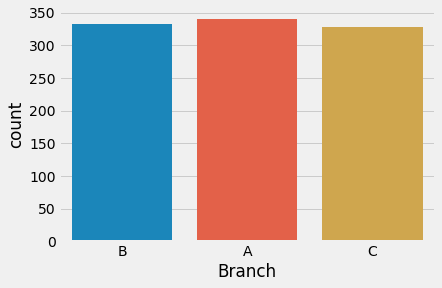

In [112]:
sns.countplot(x ='Branch', data = df1)

# Optional - Appropriate use of countplot to determine the most used payment method & city with the most sales.

<AxesSubplot:xlabel='Payment', ylabel='count'>

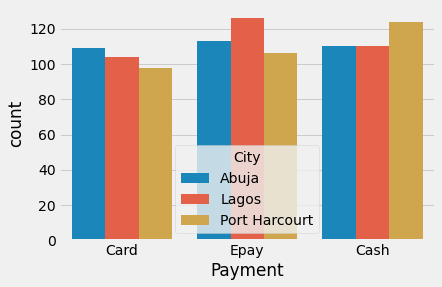

In [115]:
sns.countplot(x ='Payment', hue = df1.City, data = df1)

# Appropriate use of countplot to determine the highest & lowest sold product line

<AxesSubplot:xlabel='count', ylabel='Product line'>

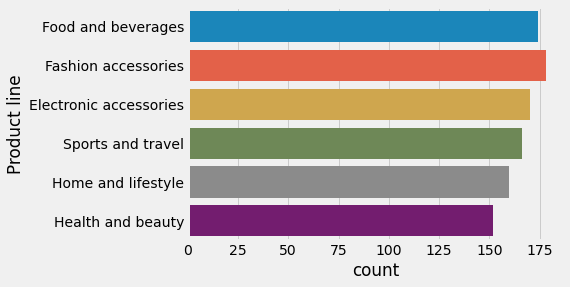

In [44]:
sns.countplot(y ='Product line', data = df1)

# Result that shows the Payment channel used by most customers to pay for each product line. Chart should also show the "product line" column on the Y-axis, and the "hue" parameter for the "Payment" column

<AxesSubplot:xlabel='count', ylabel='Product line'>

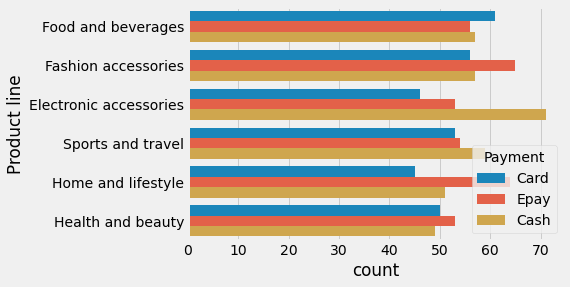

In [118]:
sns.countplot(y ='Product line', hue = df1.Payment, data = df1)

# Determine the branch with the lowest rating. This you can determine using abox plot which gives a statistical summary of the plotted features, and you can pick out the branch with the lowest rating from the plot

<AxesSubplot:xlabel='Branch', ylabel='Rating'>

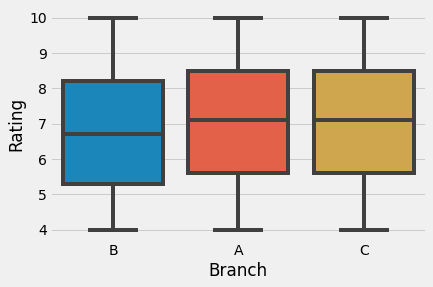

In [45]:
sns.boxplot(x='Branch', y='Rating', data=df1)

# Set the aspect parameter to 4, so can you can effectively space out each product line.
Plot the same chart, but Total Column as the y-axis

Write a summary of the insights you can pick from this chart.

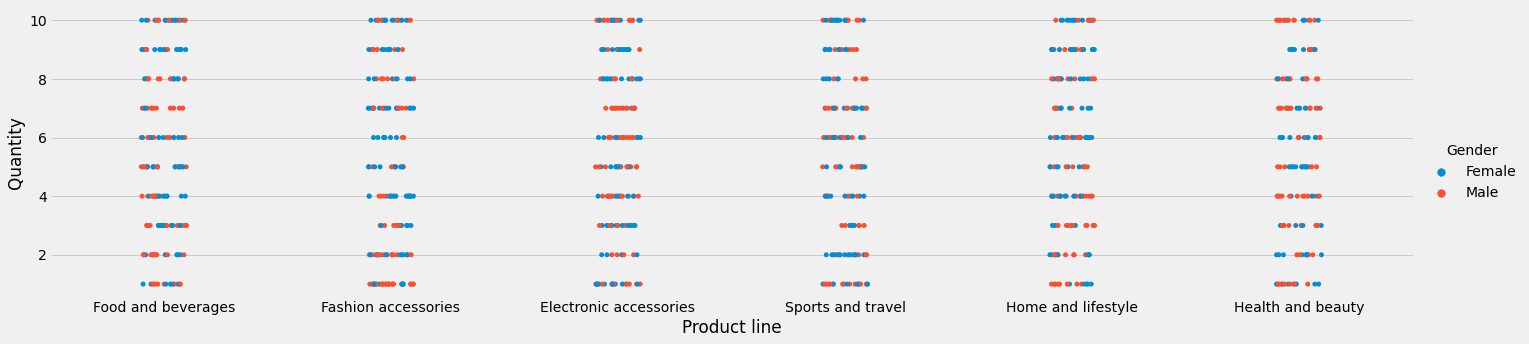

In [48]:
sns.catplot(x='Product line', y='Quantity', hue = 'Gender', aspect=4, data=df1)

# To-Do - An interesting insight to explore is the interaction of Unit price on the Quantity of goods purchased. To achieve this:¶
Use the catplot() to plot Product line per unit price, and Product line per Quantity. Set the kind parameter to point
In a new cell, Write a summary of the insights you uncovered

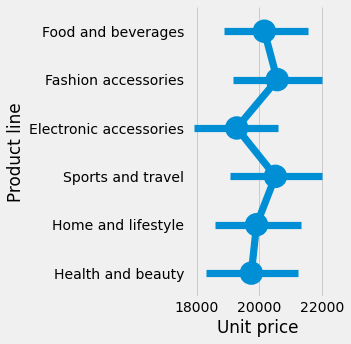

In [51]:
sns.catplot(x='Unit price', y='Product line', kind = 'point', data=df1)

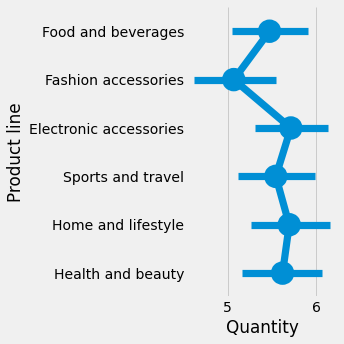

In [52]:
sns.catplot(x='Quantity', y='Product line', kind = 'point', data=df1)